In [1]:
import pygad
print(pygad.__version__)

3.3.1


In [6]:
import numpy as np
import pandas as pd
import pygad

# Đọc dữ liệu từ file CSV
data = pd.read_csv('advertising.csv')

# Chuẩn bị dữ liệu
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

# Hàm tính toán độ phù hợp (fitness function)
def fitness_function(ga_instance, solution, solution_idx):
    # Dự đoán doanh thu
    y_pred = np.dot(X, solution)
    # Tính toán sai số bình phương trung bình (MSE)
    mse = np.mean((y - y_pred) ** 2)
    # Độ phù hợp là nghịch đảo của MSE
    fitness = 1.0 / (mse + 1e-6)
    return fitness

# Thiết lập các tham số cho thuật toán di truyền
num_generations = 100
num_parents_mating = 10
sol_per_pop = 20
num_genes = X.shape[1]
init_range_low = -1.0
init_range_high = 1.0
parent_selection_type = "sss"
keep_parents = 5
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

# Khởi tạo thuật toán di truyền
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# Chạy thuật toán di truyền
ga_instance.run()

# Lấy giải pháp tốt nhất
solution, solution_fitness, solution_idx = ga_instance.best_solution()

# In ra giải pháp tốt nhất
print("Các trọng số tối ưu: ", solution)
print("Độ phù hợp của giải pháp tốt nhất: ", solution_fitness)

# Dự đoán doanh thu với giải pháp tốt nhất
y_pred = np.dot(X, solution)

# In ra một số dự đoán
print("Một số dự đoán doanh thu: ", y_pred[:5])




Các trọng số tối ưu:  [ 0.08717348  0.12898635 -0.0338619 ]
Độ phù hợp của giải pháp tốt nhất:  0.0906441216309884
Một số dự đoán doanh thu:  [22.59105775  7.42121183  5.07322797 16.55299706 15.17648232]


/Users/trangle/miniconda3/lib/python3.12/site-packages/pygad/pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


/Users/trangle/miniconda3/lib/python3.12/site-packages/pygad/pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


Các trọng số tối ưu:  [0.06581313 0.13375927 0.05813847]
Độ phù hợp của giải pháp tốt nhất:  0.16025622042085194
Một số dự đoán doanh thu:  [24.22288373 10.80746847 11.30053211 18.89604748 16.7389007 ]


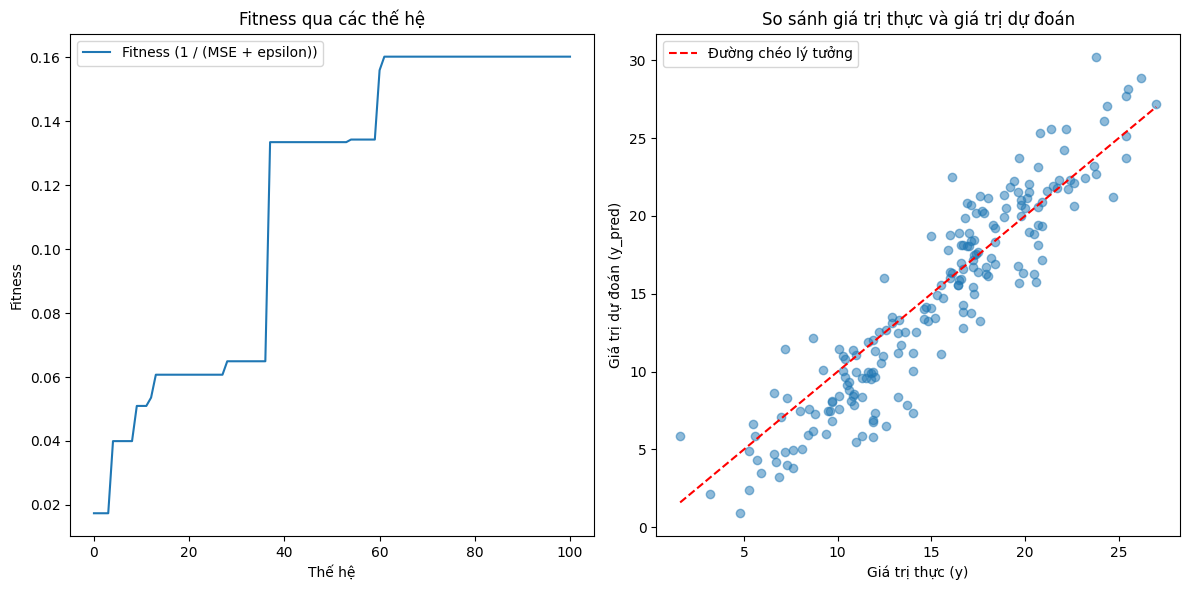

In [7]:
import numpy as np
import pandas as pd
import pygad
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('advertising.csv')

# Chuẩn bị dữ liệu
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

# Hàm tính toán độ phù hợp (fitness function)
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss = np.mean((y_hat - y) ** 2)  # Tính MSE
    return loss

def fitness_function(ga_instance, solution, solution_idx):
    loss = compute_loss(solution)
    epsilon = 1e-6  # Giá trị nhỏ để tránh chia cho 0
    fitness_value = 1.0 / (loss + epsilon)
    return fitness_value

# Thiết lập các tham số cho thuật toán di truyền
num_generations = 100
num_parents_mating = 10
sol_per_pop = 20
num_genes = X.shape[1]
init_range_low = -1.0
init_range_high = 1.0
parent_selection_type = "sss"
keep_parents = 5
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

# Khởi tạo thuật toán di truyền
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# Chạy thuật toán di truyền
ga_instance.run()

# Lấy giải pháp tốt nhất
solution, solution_fitness, solution_idx = ga_instance.best_solution()

# In ra giải pháp tốt nhất
print("Các trọng số tối ưu: ", solution)
print("Độ phù hợp của giải pháp tốt nhất: ", solution_fitness)

# Dự đoán doanh thu với giải pháp tốt nhất
y_pred = np.dot(X, solution)

# In ra một số dự đoán
print("Một số dự đoán doanh thu: ", y_pred[:5])

# Trực quan hóa loss function qua các thế hệ
plt.figure(figsize=(12, 6))

# Vẽ đồ thị loss function
plt.subplot(1, 2, 1)
plt.plot(ga_instance.best_solutions_fitness, label='Fitness (1 / (MSE + epsilon))')
plt.xlabel('Thế hệ')
plt.ylabel('Fitness')
plt.title('Fitness qua các thế hệ')
plt.legend()

# Vẽ đồ thị so sánh giá trị thực và giá trị dự đoán
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Đường chéo lý tưởng')
plt.xlabel('Giá trị thực (y)')
plt.ylabel('Giá trị dự đoán (y_pred)')
plt.title('So sánh giá trị thực và giá trị dự đoán')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************


  return features_X, sales_Y

# Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  # **************** your code here ****************

    return individual

In [ ]:
import numpy as np
import pandas as pd

# Read data from the CSV file
df = pd.read_csv('data/loan_data.csv')  # Replace 'path_to_your_file.csv' with the actual path to your CSV file

# Check the first few rows of the data to ensure it's read correctly
print(df.head())

# Separate the features (input data) and labels (output data)
X = df[['Income', 'Work_Experience', 'Credit_Score']].values  # Features: Income, Work Experience, Credit Score
y = df['Loan_Approval'].values.reshape(-1, 1)  # Labels: Loan Approval (0 or 1)

# Define the neural network class
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with random values
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))  # Bias for hidden layer
        self.bias_output = np.zeros((1, output_size))  # Bias for output layer

    # Sigmoid activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))  # Apply sigmoid to the input

    # Derivative of the sigmoid function
    def sigmoid_derivative(self, x):
        return x * (1 - x)  # Derivative of the sigmoid function used in backpropagation

    # Forward pass: compute the output from input data
    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden  # Input to hidden layer
        self.hidden_output = self.sigmoid(self.hidden_input)  # Output of hidden layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output  # Input to output layer
        self.final_output = self.sigmoid(self.final_input)  # Output of the network
        return self.final_output

    # Backward pass: update weights and biases using backpropagation
    def backward(self, X, y, learning_rate=0.1):
        output_error = y - self.final_output  # Calculate error at the output
        output_delta = output_error * self.sigmoid_derivative(self.final_output)  # Calculate delta for the output layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)  # Calculate error at the hidden layer
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)  # Calculate delta for the hidden layer

        # Update weights and biases using gradient descent
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate  # Update weights from input to hidden
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate  # Update weights from hidden to output
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate  # Update bias for hidden layer
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate  # Update bias for output layer

    # Train the neural network using the training data
    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for _ in range(epochs):  # Repeat for the specified number of epochs
            self.forward(X)  # Perform forward pass
            self.backward(X, y, learning_rate)  # Perform backward pass to update weights and biases

    # Make predictions using the trained neural network
    def predict(self, X):
        return self.forward(X)  # Perform a forward pass to predict the output for new data

# Initialize the neural network
input_size = X.shape[1]  # Number of input features
hidden_size = 5  # Number of neurons in the hidden layer
output_size = 1  # One output (loan approval: 0 or 1)

# Create an instance of the neural network
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network with the training data
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Make predictions on the training data
predictions = nn.predict(X)
print("Predictions from the neural network:")
print(predictions[:5])  # Print the first 5 predictions
